In [2]:
print("Hello")

Hello


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

In [18]:
# constants
hbar = scipy.constants.hbar
h = scipy.constants.h
pi = math.pi
m_0 = scipy.constants.physical_constants["atomic unit of mass"][0]
m_eff = 0.067 # [* m_0]
_1eV  = scipy.constants.physical_constants["electron volt"][0]
ax = 10 # [Angstrom] or [nm]
# space
n = 60 # space
kx = np.linspace(-pi/ax,pi/ax,n)

# 1D

In [23]:
# kp dispersion

E0 = 0
f = lambda kx: (hbar ** 2) * (kx ** 2) / (2 * m_eff * m_0 * _1eV * 10e-20) + E0
ek_kp = np.array(list(map(f, kx)))

# cos dispersion
dEs = 0
#t = (hbar ** 2) / (2 * m_eff * ax ** 2) # [eV]
t = 1 / (2 * m_eff * ax ** 2) * (hbar ** 2) / (m_0 * 10e-20 * _1eV)   # [eV]
#t = 0.57 # [eV]
ek_cos = dEs - 2 * t * np.cos(kx * ax)

# so it will start at the same point
'''
delta = np.amin(ek_kp)-np.amin(ek_cos)
f = lambda x: x - delta
ek_kp = np.array(list(map(f, ek_kp)))'''
f = lambda x: x - delta
delta = np.amin(ek_cos)
ek_cos = np.array(list(map(f, ek_cos)))

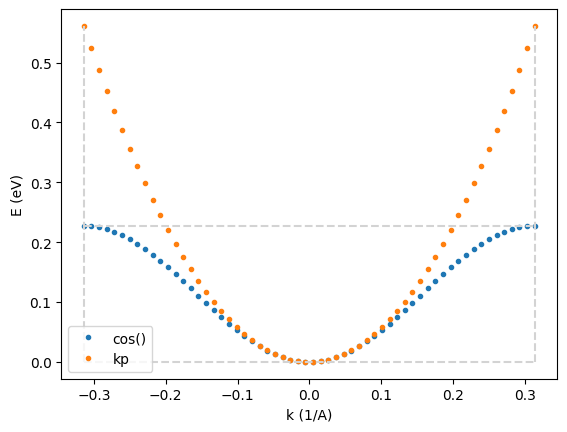

In [46]:
plt.plot(kx,ek_cos,'.', label="cos()")
plt.plot(kx,ek_kp,'.', label="kp")
#plt.ylim([1-10**-34,1+10**-34])
plt.xlabel("k (1/A)")
plt.ylabel("E (eV)")
plt.hlines(4*t, -pi/ax, pi/ax, colors="lightgray", linestyles="--")
plt.hlines(0, -pi/ax, pi/ax, colors="lightgray", linestyles="--")
plt.vlines(-pi/ax, 0, np.amax(ek_kp), colors="lightgray", linestyles="--")
plt.vlines(pi/ax, 0, np.amax(ek_kp), colors="lightgray", linestyles="--")
plt.legend()
plt.show()

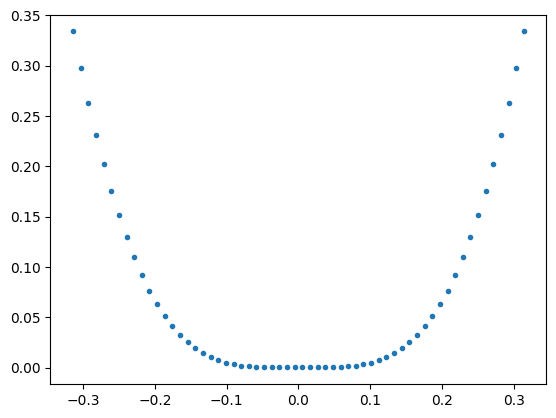

In [48]:
plt.plot(kx,ek_kp-ek_cos,'.')
plt.show()

# 2D cos

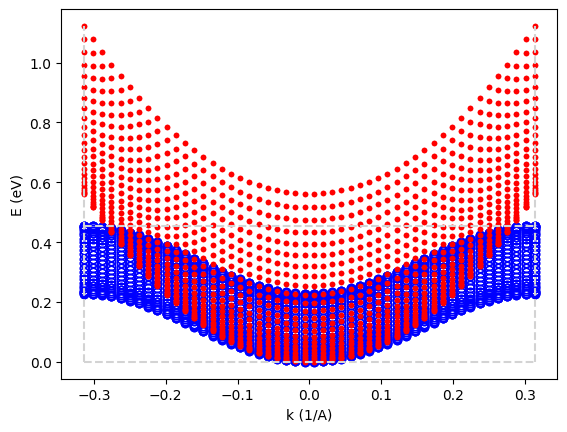

In [98]:
a = 10 # [Angstrom]
# space
n=50
kx = np.linspace(-pi/a,pi/a,n)
ky = np.linspace(-pi/a,pi/a,n)
kxx, kyy = np.meshgrid(kx, ky)
dEs = 0
# t = (hbar ** 2) / (2 * m_eff * a ** 2) # [eV]
t = 1 / (2 * m_eff * a ** 2) * (hbar ** 2) / (m_0 * 10e-20 * _1eV)   # [eV]

# kp
f = lambda kx, ky: (hbar ** 2) * (kx ** 2 + ky ** 2) / (2 * m_eff * m_0 * _1eV * 10e-20) + E0
ek_kp = np.array(list(map(f, kxx, kyy)))


# cos
ek_cos = dEs - 2 * t * (np.cos(kxx * a) + np.cos(kyy * a))

'''ek_cos_x = dEs - 2 * t * np.cos(kx * a)
ek_cos_y = dEs - 2 * t * np.cos(ky * a)
X, Y = np.meshgrid(ek_cos_x,ek_cos_y)
ek_cos = np.column_stack((X.ravel(), Y.ravel()))
print(X, Y)

ek_cos = np.zeros([n,n])
for i in range(0,n):
    for j in range(0,n):
        ek_cos[i][j] = dEs - 2 * t * (np.cos(kx[i] * a) + np.cos(ky[j] * a))
'''
f = lambda x: x - delta
delta = np.amin(ek_cos)
ek_cos = np.array(list(map(f, ek_cos)))

for i in range(n):
    plt.plot(kx,ek_cos[i],'o', mfc = 'none', mec = 'blue', color="blue", label="cos()")
for i in range(n):    
    plt.plot(kx,ek_kp[i],'.', color="red", label="kp")
#plt.plot(ek_cos[1])
#plt.ylim([1-10**-34,1+10**-34])
#plt.legend()
#plt.show()
#plt.imshow(ek_cos, cmap='hot', interpolation='nearest')
plt.xlabel("k (1/A)")
plt.ylabel("E (eV)")
plt.hlines(8*t, -pi/a, pi/a, colors="lightgray", linestyles="--")
plt.hlines(0, -pi/a, pi/a, colors="lightgray", linestyles="--")
plt.vlines(-pi/a, 0, np.amax(ek_kp), colors="lightgray", linestyles="--")
plt.vlines(pi/a, 0, np.amax(ek_kp), colors="lightgray", linestyles="--")
plt.show()

In [12]:
import numpy as np

def hamiltonian(n, t):
    H = np.zeros((n, n))
    for i in range(n - 1):
        H[i, i + 1] = -t
        H[i + 1, i] = -t
    return H

def solve_tight_binding(n, t):
    k = np.linspace(-np.pi, np.pi, n)
    E = np.zeros(n)
    for j in range(n):
        h_k = np.zeros((n, n))
        for i in range(n - 1):
            h_k[i, i + 1] = -t * (np.exp(-1j * k[j]) + np.exp(1j * k[j]))
            h_k[i + 1, i] = -t * (np.exp(-1j * k[j]) + np.exp(1j * k[j]))
        eigenvalues, _ = np.linalg.eigh(h_k)
        E[j] = np.max(eigenvalues)
    return E
'''
if __name__ == "__main__":
    n = int(input("Enter the number of sites: "))
    t = float(input("Enter the hopping parameter (t): "))

    H = hamiltonian(n, t)
    print("\nHamiltonian matrix:")
    print(H)

    E = solve_tight_binding(n, t)
    print("\nEnergies for the given system:")
    print(E)
'''

'\nif __name__ == "__main__":\n    n = int(input("Enter the number of sites: "))\n    t = float(input("Enter the hopping parameter (t): "))\n\n    H = hamiltonian(n, t)\n    print("\nHamiltonian matrix:")\n    print(H)\n\n    E = solve_tight_binding(n, t)\n    print("\nEnergies for the given system:")\n    print(E)\n'

In [13]:
n = 4 # int(input("Enter the number of sites: "))
t = 0.056865404718729244 # float(input("Enter the hopping parameter (t): "))

H = hamiltonian(n, t)
print("\nHamiltonian matrix:")
print(H)

E = solve_tight_binding(n, t)
print("\nEnergies for the given system:")
print(E)


Hamiltonian matrix:
[[ 0.        -0.0568654  0.         0.       ]
 [-0.0568654  0.        -0.0568654  0.       ]
 [ 0.        -0.0568654  0.        -0.0568654]
 [ 0.         0.        -0.0568654  0.       ]]

Energies for the given system:
[0.18402032 0.09201016 0.09201016 0.18402032]


C:\Users\Tomek\AppData\Local\Temp\ipykernel_4540\128336414.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  h_k[i, i + 1] = -t * (np.exp(-1j * k[j]) + np.exp(1j * k[j]))
C:\Users\Tomek\AppData\Local\Temp\ipykernel_4540\128336414.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  h_k[i + 1, i] = -t * (np.exp(-1j * k[j]) + np.exp(1j * k[j]))
